## Predicting heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

#### 1. Problem Definition
In a statement,
> Given clinical parameters about the patient, can we predict whether or not they have heart-disease?

#### 2. Data
>The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

#### 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

#### 4. Features

>This is where we get information about each of the features in our data.

**Create data dictionary**

This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

01. Age: Patients Age in years (Numeric)
02. Sex: Gender (Male : 1; Female : 0) (Nominal)
03. cp: Type of chest pain experienced by patient. This term categorized into 4 category.
       0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
04. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
05. chol: Serum cholesterol in mg/dl (Numeric)
06. fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
07. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
            0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
            0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
08. thalach: Maximum heart rate achieved (Numeric)
09. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise
           0: up sloping; 1: flat; 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia
          0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
14. target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

#### 5. Modelling
>Choosing the model and hyperparameter tuning to improve it.

#### 6. Experimentation
Before hitting the evaluation metrics:
* Can we collect more data?
* Can we try a better model? Like CatBoost or XGBoost?
* Can we improve the current models?
* If the model is good enough, how to export and share it with others?

### Preparing the tools

We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing all the scikit-learn models we need(Choosing from sklearn model map)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

**Load Data**

In [3]:
df = pd.read_csv("heartkaggle.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
df.shape, df.size

((1025, 14), 14350)

## Data Exploration (EDA)
Finding out more about the data.

1. What question(s) are we trying to solve?
2. What kind of data we have and how do we treat different datatypes?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of the data?

In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:

df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

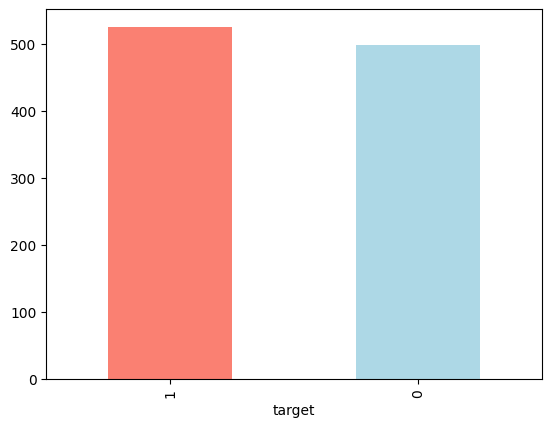

In [8]:

df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
# More info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
# missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart Disease frequency accoriding to gender (sex)**

In [12]:
df["sex"].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [13]:
# Comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


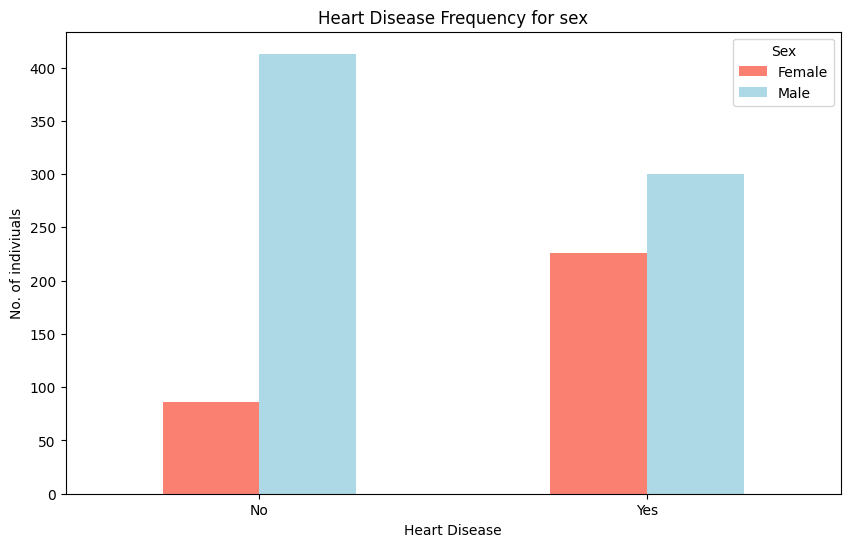

In [14]:
 
re_name = {0: "No", 1: "Yes"}
ts_plot = pd.crosstab(df.target, df.sex).rename(re_name).plot(kind="bar",
                                                    figsize=(10, 6),
                                                    color=["salmon", "lightblue"], rot=0,
                                                    xlabel="Heart Disease", ylabel="No. of indiviuals")
ts_plot.set_title("Heart Disease Frequency for sex")
ts_plot.legend(["Female", "Male"], title="Sex");

In [15]:
pd.crosstab(df.age, df.target)

target,0,1
age,,
29,0,4
34,0,6
35,7,8
37,0,6
38,4,8
39,4,10
40,8,3
41,3,29
42,4,22


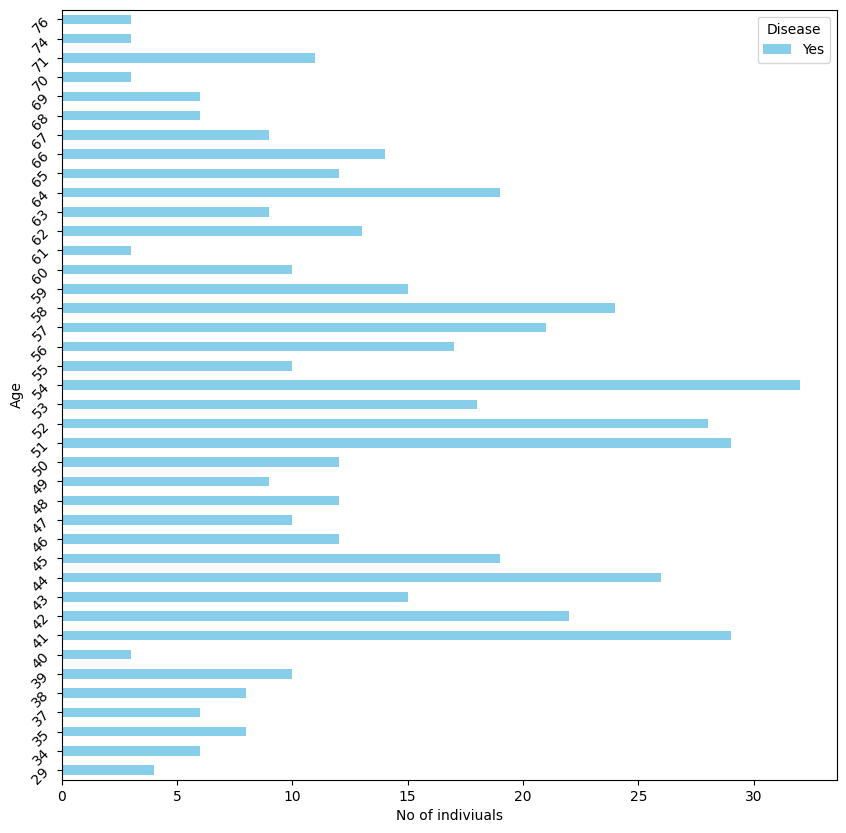

In [16]:
# age vs target for positive
ta_plot = pd.crosstab(df.age, df.target[df.target==1]).plot(kind="barh",
                                              figsize=(10, 10),
                                              xlabel="No of indiviuals",
                                              ylabel="Age",
                                              rot=45, color=["skyblue"])

ta_plot.legend(["Yes"], title="Disease");

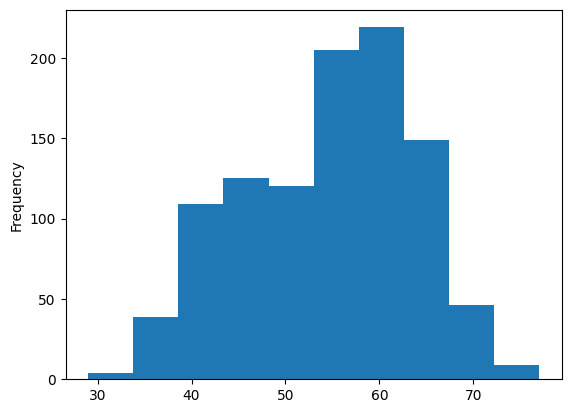

In [17]:
# distribution of the age column with a histogram

df.age.plot(kind="hist");

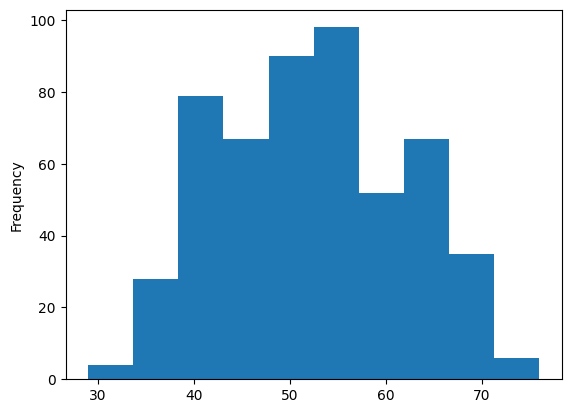

In [18]:
# indiviuals having heart disease
df.age[df.target==1].plot(kind="hist");

**Age vs Max Heart Rate for Heart Disease**

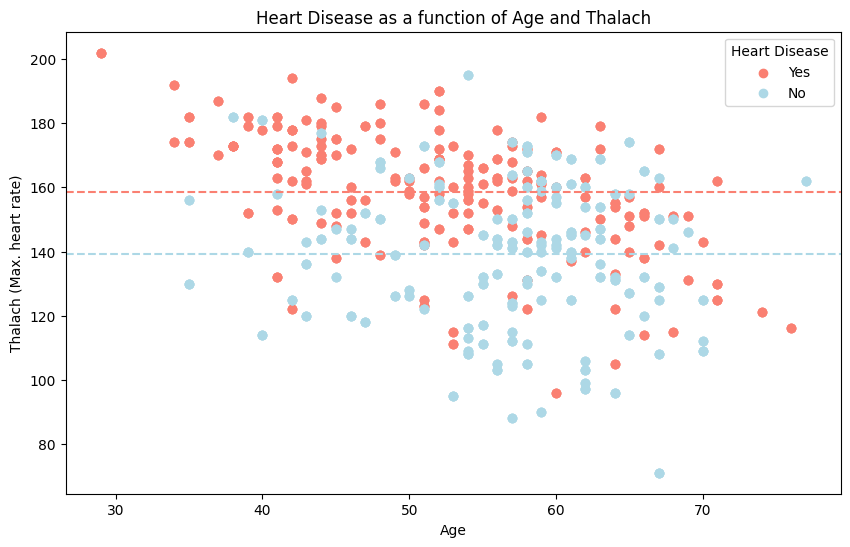

In [19]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],
            color="salmon", label="Yes")
# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],
            color="lightblue", label="No")
plt.legend(title="Heart Disease")
plt.axhline(df.thalach[df.target==1].mean(), linestyle="dashed", color="salmon")
plt.axhline(df.thalach[df.target==0].mean(), linestyle="dashed", color="lightblue")

# Add some useful info
plt.title("Heart Disease as a function of Age and Thalach")
plt.xlabel("Age")
plt.ylabel("Thalach (Max. heart rate)");

**Heart Disease frequency per Chest Pain Type**

cp: Type of chest pain experienced by patient. This term categorized into 4 category:

      *0 typical angina 
      *1 atypical angina 
      *2 non- anginal pain 
      *3 asymptomatic (Nominal)

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


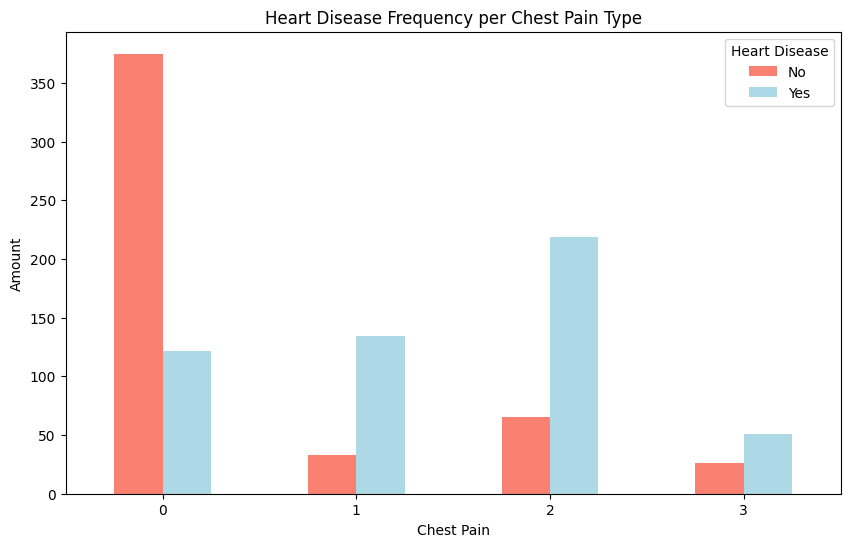

In [21]:
# Making it more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   xlabel="Chest Pain", ylabel="Amount",
                                   rot=0, color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.legend(["No", "Yes"], title="Heart Disease");

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


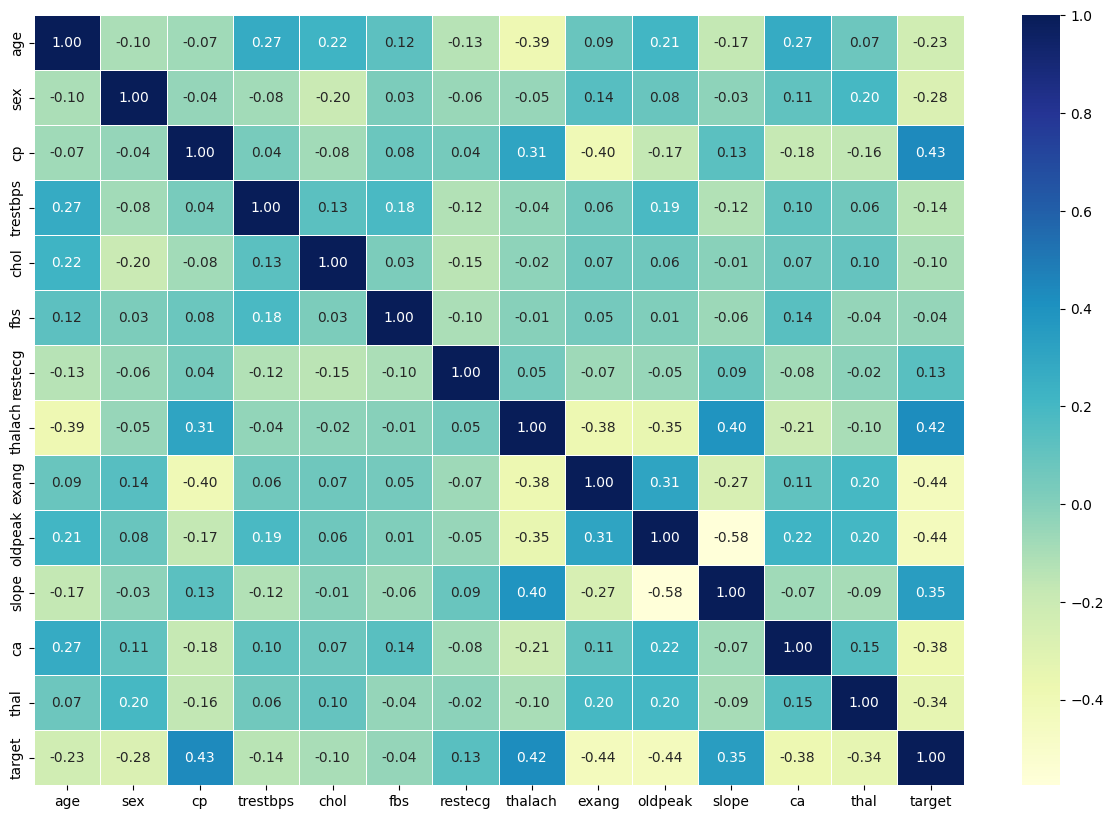

In [24]:
# Making correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True,
                 linewidths=0.5, fmt=".2f",
                 cmap="YlGnBu");

### 5. Modelling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
# Splitting the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [29]:
# Splitting the data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [31]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

***Training (finding patterns) on the training set and testing (use the patterns) on test set.***

Trying 3 different models:
1. Logistic Regression
2. K-Nearest Neighbours
3. RandomForestClassifier

1.K Nearest  Neighbors

In [32]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("heartkaggle.csv")

X = df.drop("target", axis=1)  
y = df["target"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)  # (default is 5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"KNN Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions_df.tail())


KNN Model Accuracy: 0.82
Confusion Matrix:
[[77 25]
 [11 92]]
     Actual  Predicted
832       1          1
796       1          1
644       1          1
404       0          0
842       0          0


In [33]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("heartkaggle.csv")

# Split the data into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Gradient Boosting Accuracy: 0.93
Confusion Matrix:
[[93  9]
 [ 5 98]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Sort and display feature importance
feature_names = df.drop(columns=["target"]).columns
sorted_idx = np.argsort(importances)[::-1]

print("\nFeature Importance (Random Forest):")
for i in sorted_idx:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Feature Importance (Random Forest):
cp: 0.1351
ca: 0.1273
thalach: 0.1222
oldpeak: 0.1219
thal: 0.1105
age: 0.0779
chol: 0.0748
trestbps: 0.0712
exang: 0.0576
slope: 0.0458
sex: 0.0287
restecg: 0.0186
fbs: 0.0084
